## Vinculacion con la API del BCRP

Se usara la API del Banco Central de Reserva del Peru para la importacion de una o mas series

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import datetime

from api_bcrp import get_bcrp_data

import warnings
warnings.simplefilter("ignore")

ModuleNotFoundError: No module named 'api_bcrp'

La funcion para poder realizar una conexion con la API del BCRP data es la siguiente: 

In [ ]:
?get_bcrp_data

Signature: get_bcrp_data(series, fechaini, fechafin)
Docstring:
Importar multiples series de la API del BCRP

Parametros
----------
series: list
    Lista de los codigos de las series

fechaini: str
    Fecha de inicio de la serie 
    
    - Diario: yyyy-mm-dd
    - Mensual: yyyy-mm
    - Trimestral: yyyy'Q'm 
    - Anual: yyyy

fechafin: str
    Fecha de fin de la serie
    
    - Diario: yyyy-mm-dd
    - Mensual: yyyy-mm
    - Trimestral: yyyy'Q'm 
    - Anual: yyyy
    
Retorno
----------
df: pd.DataFrame
    Series definidar


Series usuales (nombre, frecuencia, unidad)
----------
* PN02526AQ: PBI, trimestral, var% real anual
* PN02518AQ: Consumo privado, trimestral, var% real anual
* PN02522AQ: Inversion bruta fija - privada, trimestral , var% real anual
* PN02524AQ: Exportaciones, trimestral , var% real anual
* PN02525AQ: Importaciones, trimestral , var% real anual
* PN02517AQ: Demanda interna, trimestral , var% real anual
* PN02527AQ: Demanda interna sin inventarios, trimestral

La funcion `wbscr_bcrp` nos permite importar, por _default_ una serie y la convierte en un _Dataframe_. En este primer caso se importara la inflacion mensual anuales -con codigo `PN01273PM`- desde el `2001-1` hasta el `2012-12`

,PN01273PM
time,
Feb.2002,-1.114360
Mar.2002,-1.084349
Apr.2002,0.053616
May.2002,0.168196
Jun.2002,-0.002035
...,...
Jan.2014,3.066631
Feb.2014,3.779297
Mar.2014,3.377928


In [4]:
inflac.head(4)

,PN01273PM
time,
2001-01-01,3.856948
2001-02-01,3.614293
2001-03-01,3.579926
2001-04-01,2.623670


Se realizara una transformacion de los datos del indice para convertirlos a formato `datetime`

In [5]:
inflac.index = pd.to_datetime(inflac.index, format="%b.%Y")

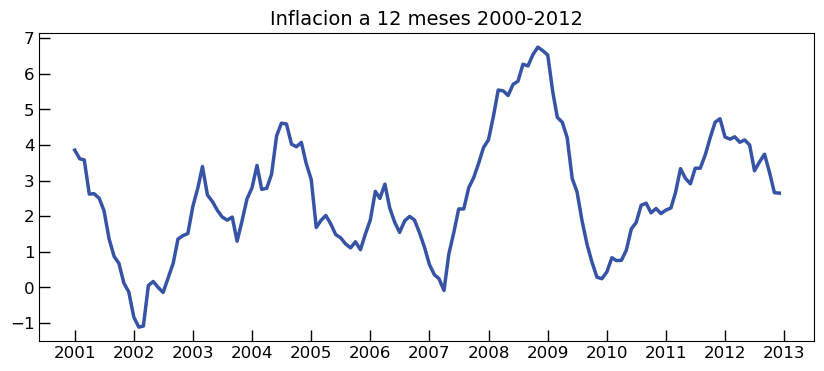

In [6]:
fig, ax = plt.subplots(figsize=(10, 4), linewidth = 2.5)

plt.title("Inflacion a 12 meses 2000-2012", fontsize = 14)

ax.plot(inflac, color= "#3653A5", linewidth = 2.5)

# Ticks
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.tick_params(direction='in', which='both', length=8, width=1, labelsize=12) # Formato de los ticks

plt.savefig("../figures/inflacion2000-2012.pdf", bbox_inches="tight", transparent=True)
plt.show()

De igual manera, se puede importar mas de una serie. Para ello, se debe colocar la cantidad de series como parametro en la funcion. Se importara el consumo privado -con codigo `PN02518AQ`- y el PBI trimestral con codigo -`PN02526AQ`-. Ambas variables trimestrales y en variaciones anuales. Los periodos seran del `2001T1`-`2019T4` 

In [7]:
dta = get_bcrp_data(["PN02518AQ", "PN02526AQ"], "2001T1", "2019T4")

In [8]:
dta.rename(columns = {"PN02518AQ":"Consumo", "PN02526AQ":"PBI"}, inplace=True)

dta.tail(4)

,Consumo,PBI
time,,
Q1.19,3.580000,2.436272
Q2.19,2.910332,1.169576
Q3.19,3.430878,3.363626
Q4.19,3.080000,2.006436


A pesar que la libreria `datetime` no permite un formato de fecha trimestral, se puede realizar una transformacion en el que se colocaran los trimestres en formato de meses

In [9]:
dta.index = dta.index.str[3:] + dta.index.str[:2]
dta.index = pd.PeriodIndex(dta.index.astype(str).str.replace(r'(\d{4})[0]?(\d{1})', r'\1q\2'), freq='Q').to_timestamp(freq='M')

In [10]:
dta.tail(4)

,Consumo,PBI
time,,
2019-01-31,3.580000,2.436272
2019-04-30,2.910332,1.169576
2019-07-31,3.430878,3.363626
2019-10-31,3.080000,2.006436


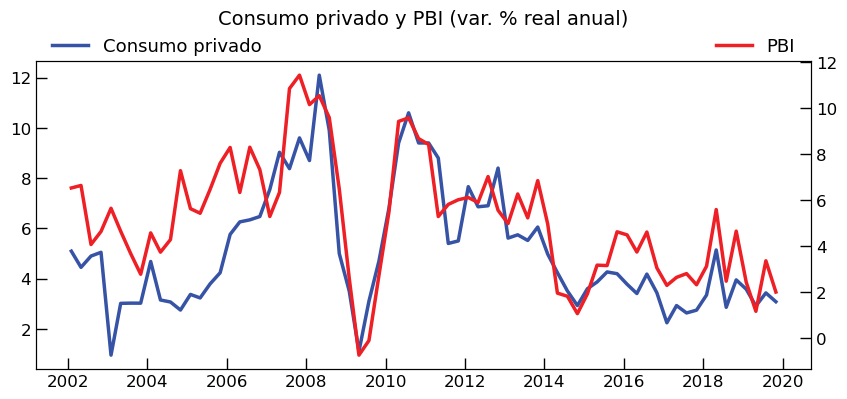

In [11]:
fig, ax1 = plt.subplots(figsize=(10, 4), linewidth = 2.5)
ax2 = ax1.twinx()

plt.text(0.5, 1.12, "Consumo privado y PBI (var. % real anual)", horizontalalignment='center', fontsize=14, transform = ax1.transAxes)

# Gráficas
ax1.plot(dta.index, dta["Consumo"], label = "Consumo privado", color= "#3653A5", linewidth = 2.5)
ax2.plot(dta.index, dta["PBI"], label = "PBI", color= "#EE1F25", linewidth = 2.5)

# Posicionando las leyendas
ax1.legend(bbox_to_anchor=(0, 1.13), loc = 'upper left', fontsize=13, frameon=False)
ax2.legend(bbox_to_anchor=(1, 1.13), loc = 'upper right', fontsize=13, frameon=False)

# Editando los ticks
ax1.tick_params(direction='in', which='both', length=8, width=1, labelsize=12)
ax2.tick_params(direction='in', which='both', length=8, width=1, labelsize=12)


plt.savefig("../figures/consumo-pbi.pdf", bbox_inches="tight", transparent=True)
plt.show()